<a href="https://colab.research.google.com/github/WEBAAA3/experimentos/blob/main/C%C3%B3pia_de_Ruidos__segementa%C3%A7oes_antigas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e conexão ao drive

In [ ]:
!pip install scikit-image

In [ ]:
!pip install scipy

In [ ]:
from google.colab import drive

# Autorização
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/')

%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 58-0-42-1_segmented.png                 novo_novo_csvdosgrandes_ruidos.csv
 62-0-38-1_segmented.png                 novo_novo_csvdosmedios_ruidos.csv
'Colab Notebooks'/                       novo_novo_csvdospqnos_ruidos.csv
'Cópia de segementaçoes antigas.ipynb'  'Ruidos_ segementaçoes antigas.ipynb'
 dataset_seg@


In [ ]:
import skimage.io as ski
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import slic
from scipy import ndimage as ndi
from skimage import feature
import csv
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.metrics import variation_of_information
from skimage.metrics import variation_of_information
from skimage import measure
from skimage.segmentation import mark_boundaries
import cv2

# coisas antigas


In [ ]:

os.chdir('/content/drive/My Drive/dataset_seg/grande/geradas/')
os.listdir()

['dataset_seg',
 'balanceado e shaped.csv',
 'Colab Notebooks',
 '58-0-42-1_segmented.png',
 '62-0-38-1_segmented.png',
 'Cópia de segementaçoes antigas.ipynb']

In [ ]:
img_filename='3-10-87-235.png'

In [ ]:
img_seg_filename='segmented/3-10-87-235_segmented.png'
image_seg_orig= ski.imread(img_seg_filename)
ski.imshow(image_seg_orig)

FileNotFoundError: ignored

In [ ]:
image_orig= ski.imread(img_filename)
ski.imshow(image_orig)

In [ ]:
#from skimage.color import rgb2gray
image_gray =rgb2gray(image_orig)
ski.imshow(image_gray)

In [ ]:
#from skimage.filters import threshold_otsu

thresh = threshold_otsu(image_gray)
binary = image_gray > thresh
ski.imshow(binary)

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy import ndimage as ndi

#from skimage.segmentation import watershed
#from skimage.feature import peak_local_max

image=binary


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
img_branco = np.zeros(image_orig.shape,dtype=np.uint8)
img_branco.fill(255)

In [ ]:


marked = mark_boundaries(img_branco, labels,color=(0, 0, 0))

In [ ]:
ski.imshow(marked)

In [ ]:
ski.imshow(image_seg_orig)

In [ ]:
ski.imshow(image_orig)

In [ ]:
#from skimage.segmentation import slic

segments = slic(image_orig, n_segments=1000, compactness=2.8,max_iter=10)

In [ ]:
marked_k_means = mark_boundaries(img_branco, segments,color=(0, 0, 0))
ski.imshow(marked_k_means)

In [ ]:
#from scipy import ndimage as ndi

#from skimage import feature

im=image_gray
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
thresh = threshold_otsu(rgb2gray(image_seg_orig))
binary_seg = rgb2gray(image_seg_orig) > thresh
ski.imshow(binary_seg)

In [ ]:
thresh = threshold_otsu(image_gray)
binary_ostu = image_gray > thresh
ski.imshow(binary_ostu)

In [ ]:
thresh = threshold_otsu(rgb2gray(marked_k_means))
binary_k_means = rgb2gray(marked_k_means) > thresh
ski.imshow(binary_k_means)

In [ ]:
thresh = threshold_otsu(rgb2gray(marked))
binary_watershed = rgb2gray(marked) > thresh
ski.imshow(binary_watershed)

In [ ]:
binary_canny=~edges1
ski.imshow(binary_canny)

In [ ]:
def performance_indicator(perfeita, teste):
  Rs= np.sum(perfeita)
  matriz=np.array((perfeita.shape))
  Ts= np.sum((perfeita==1) & (teste==1))
  Os= np.sum((perfeita==0) & (teste==1))
  Ws= np.sum((perfeita==1) & (teste==0))

  SA= (1-(np.abs(Rs-Ts)/Rs))
  OS= (Os/(Os+Rs))
  US= (Ws/(Rs+Os))
  return [SA, OS, US]



In [ ]:
#OTSU
[SA,OS,US] = performance_indicator(binary_seg,binary_ostu)
print('SA:', SA)
print('OS:', OS)
print('US:', US)

In [ ]:
#K MEANS
[SA,OS,US] = performance_indicator(binary_seg,binary_k_means)
print('SA:', SA)
print('OS:', OS)
print('US:', US)

In [ ]:
#WATERSHED
[SA,OS,US] = performance_indicator(binary_seg,binary_watershed)
print('SA:', SA)
print('OS:', OS)
print('US:', US)

In [ ]:
#CANNY
[SA,OS,US] = performance_indicator(binary_seg,binary_canny)
print('SA:', SA)
print('OS:', OS)
print('US:', US)

In [ ]:
imagem_nova = ski.imread('/content/drive/My Drive/62-0-38-1_segmented.png')
thresh = threshold_otsu(rgb2gray(imagem_nova))
binary_novo = rgb2gray(imagem_nova) > thresh
ski.imshow(binary_novo)

In [ ]:
from skimage.morphology import square, closing
close = closing((1-binary_seg), square(3))

ski.imshow(close)

In [ ]:
from skimage import measure

img_=binary_novo

labels = measure.label(img_, background=0) # same image_binary as above
propsa = measure.regionprops(labels)

for label in propsa:
    object_size = len(label.coords)

In [ ]:
img_.shape

In [ ]:
diametros=[]
contador_de_graos=[]
for prop in propsa:
    print('Label: {} >> Object size: {}'.format(prop.label, prop.equivalent_diameter*(46/224)))
    diametros.append(prop.equivalent_diameter*(46/224))


# aqui começa a parte nova/util/organizada


In [ ]:
def trueKmeans(image_orig):
  img_branco = np.zeros(image_orig.shape,dtype=np.uint8)
  img_branco.fill(255)
  segments = slic(image_orig, n_segments=1000, compactness=2.8,max_iter=10)
  marked_k_means = mark_boundaries(img_branco, segments,color=(0, 0, 0))
  #ski.imshow(marked_k_means)
  marked_k_means[0,0,0]=255
  thresh = threshold_otsu(rgb2gray(marked_k_means))
  binary_k_means = rgb2gray(marked_k_means) > thresh
  #ski.imshow(binary_k_means)
  return binary_k_means

In [ ]:
def truewatershed(image_orig):
  img_branco = np.zeros(image_orig.shape,dtype=np.uint8)
  img_branco.fill(255)
  image_gray =rgb2gray(image_orig)
  thresh = threshold_otsu(image_gray)
  binary = image_gray > thresh
  image=binary
  distance = ndi.distance_transform_edt(image)
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),labels=image)
  markers = ndi.label(local_maxi)[0]
  labels = watershed(-distance, markers, mask=image)
  marked = mark_boundaries(img_branco, labels,color=(0, 0, 0))
  marked[0,0,0]=255
  thresh = threshold_otsu(rgb2gray(marked))
  binary_watershed = rgb2gray(marked) > thresh
  #ski.imshow(binary_watershed)
  return binary_watershed

In [ ]:
def truekanny(image_orig):
  image_gray =rgb2gray(image_orig)
  im=image_gray
  edges1 = feature.canny(im)
  binary_canny=~edges1
  return binary_canny

In [ ]:
def trueotsu(image_orig):
  image_gray =rgb2gray(image_orig)
  thresh = threshold_otsu(image_gray)
  binary = image_gray > thresh
  return binary

In [ ]:
def truediametros(img_):

  labels = measure.label(img_, background=0) # same image_binary as above
  propsa = measure.regionprops(labels)
  diametros=[]
  for prop in propsa:
     # print('Label: {} >> Object size: {}'.format(prop.label, prop.equivalent_diameter*(46/224)))
      diametros.append(prop.equivalent_diameter*(46/224))

  return diametros

In [ ]:
def fpercent(diametros):
  grandes = 0
  medios = 0
  pequenos = 0
  irregular = 0
  total = 0
  for k in range(len(diametros)):
      if diametros[k] >= 3.36  and diametros[k] < 12 :
        grandes = grandes + 1
      elif diametros[k] >= 2.36  and diametros[k] < 3.36 :
        medios = medios + 1
      elif diametros[k] >= 0.8 and diametros[k] < 2.36  :
        pequenos = pequenos + 1
      elif diametros[k] >= 12 or  diametros[k] < 0.8 :
        irregular = irregular + 1
  total = grandes + medios + pequenos
  if total == 0:
    return [0,0,0]
  else:
    pgrandes  = (grandes * 100) /  total
    pmedio  = (medios * 100) /  total
    ppequenos = (pequenos * 100) /  total
    porcentagens= [pgrandes,pmedio,ppequenos]
    return porcentagens


In [ ]:
def truepercent(imagem):
  tru1 = truediametros(imagem)
  tru2 = fpercent(tru1)
  return tru2

In [ ]:
#se analise do pqnos
#ind=2
#se analise dos medios
#ind=2
#se analise dos grandes
#ind=0
##if ind==0:
##  cd='/content/drive/My Drive/dataset_seg/grande/geradas/'
##  os.chdir(cd)
##  filelist = os.listdir()
##else:
##  cd='/content/drive/My Drive/dataset_seg/furdunco/geradas/'
##  os.chdir(cd)
##  filelist = os.listdir()
tamanho = 'pqnos'
if tamanho == 'grandes':
  ind=0
elif tamanho == 'medios':
  ind=1
elif tamanho == 'pqnos':
  ind=2

In [ ]:
cd_ruidos=['/content/drive/My Drive/dataset_seg/ruidosos/geradas/original/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/blur/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/gama maior/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/gama menor/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/gaussian/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/poisson/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/S&P/',
           '/content/drive/My Drive/dataset_seg/ruidosos/geradas/speckle/']

In [ ]:
errototal = []
count2 = 0
for cd in cd_ruidos:
  os.chdir(cd)
  filelist=os.listdir()
  for files in filelist:
      if files.endswith('.png'):
        g=int(files.split('-')[0])
        m=int(files.split('-')[1])
        p=int(files.split('-')[2])
        if ((ind==1 and m>g and m>p) or (ind==2 and p>m and p>g) or (ind==0 and g>m and g>p)):
          imagemnormal =  ski.imread(cd + files)
          if cd =='/content/drive/My Drive/dataset_seg/ruidosos/geradas/original/':
            file_seg = files
          imagemsegmentada= trueotsu(ski.imread ('/content/drive/My Drive/dataset_seg/ruidosos/geradas/segmented/'+ file_seg[:-4]+'_segmented.png'))
          kmeans = trueKmeans(imagemnormal)
          watershed1 = truewatershed(imagemnormal)
          kanny = truekanny(imagemnormal)
          otsu = trueotsu(imagemnormal)
          trueporcentagem = truepercent(imagemsegmentada)
          count = 0
          count2 = count2 + 1
          print(count2,files)
          for img in [kmeans, watershed1, kanny, otsu]:
              count = count  + 1
              geradaporcentagem = truepercent(img)
              erropgrande = abs(trueporcentagem[0] - geradaporcentagem[0])
              erropmedio = abs(trueporcentagem[1] - geradaporcentagem[1])
              erroppequeno = abs(trueporcentagem[2] - geradaporcentagem[2])
              erromedio = (erropgrande + erropmedio + erroppequeno )/ 3
              errototal.append([cd, files,trueporcentagem[0],trueporcentagem[1],trueporcentagem[2],erropgrande,erropmedio,erroppequeno,erromedio,count])


KeyboardInterrupt: ignored

In [ ]:
with open('/content/drive/My Drive/csvdos'+ (tamanho)+'_ruidos.csv', mode='w') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerows(errototal)

In [ ]:
print(np.asarray(errototal[1]))

In [ ]:
plt.hist(diametros,bins=5)

In [ ]:
from skimage.color import label2rgb
import matplotlib.patches as mpatches
image_label_overlay = label2rgb(labels, image=img_, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

k=0
for region in propsa:
    k=k+1
    # take regions with large enough areas
      # draw rectangle around segmented coins
#      minr, minc, maxr, maxc = region.bbox
      minr, minc, maxr, maxc = region.bbox
      bx = (minc, maxc, maxc, minc, minc)
      by = (minr, minr, maxr, maxr, minr)
     # ax.plot(bx, by, '-b', linewidth=2.5)
      x,y = region.centroid
      #rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
      #                         fill=False, edgecolor='red', linewidth=2)
      #ax.add_patch(rect)
      ax.plot(y, x, '.g', markersize=15)
ax.set_axis_off()
plt.tight_layout()
plt.show()



# Tratamento dos resultados - Total

In [ ]:
import csv
tabelao=[]
with open('/content/drive/My Drive/novo_novo_csvdospqnos_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1
with open('/content/drive/My Drive/novo_novo_csvdosmedios_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1
with open('/content/drive/My Drive/novo_novo_csvdosgrandes_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1

['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']
['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']
['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']


In [ ]:
tabelao_np=np.asarray(tabelao)
tabelao_np.shape

(38184, 13)

In [ ]:
seg_methods=['K-means', 'Watershed','Kanny', 'OTSU']

In [ ]:
np.unique(tabelao_np[:,2])

array(['', 'SeP0', 'blur0', 'gamamaior0', 'gamamenor0', 'gaussian0',
       'poisson', 'speckle0', 'speckle0.25.png'], dtype='<U64')

In [ ]:
noises=['','SeP0', 'blur0', 'gamamaior0', 'gamamenor0', 'gaussian0','poisson', 'speckle0']
noises_beaut = ['','Salt & Pepper', 'Blur', 'Gamma>1', 'Gamma<1', 'Gaussian','Poisson', 'Speckle']
colors=["#000000","red","#1CE6FF","#FF34FF","#008941", "#006FA6","gold","#6367A9","#E83000"]

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

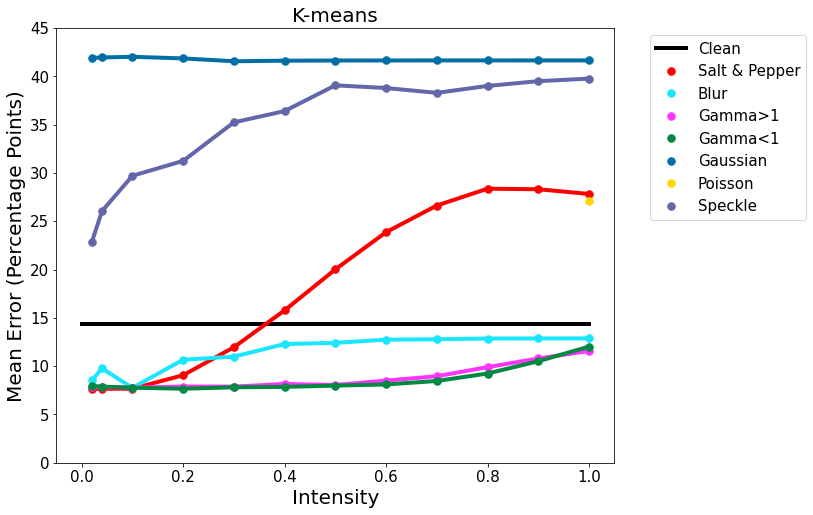

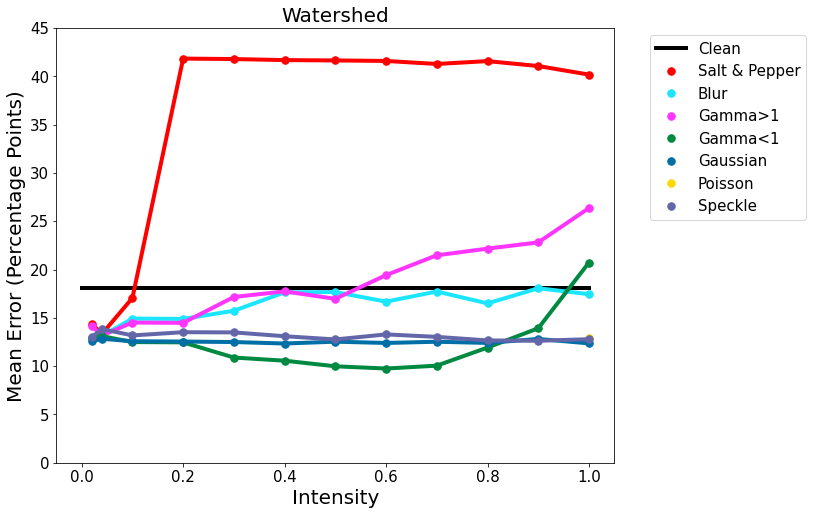

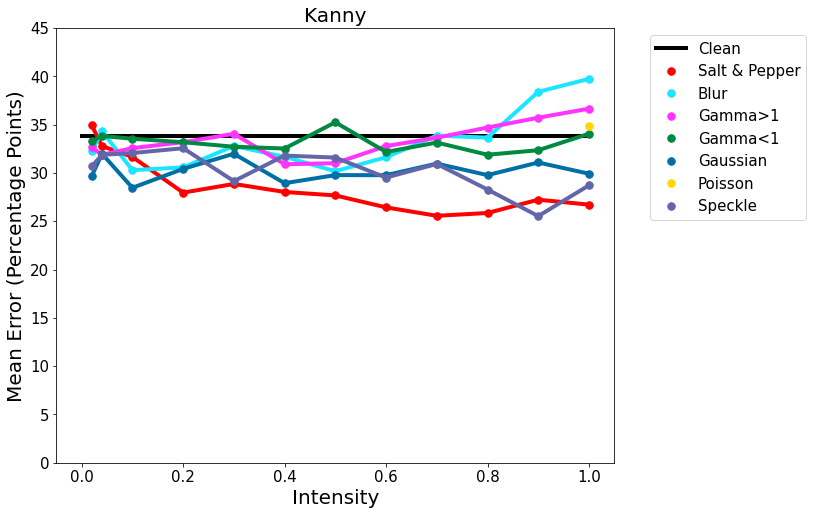

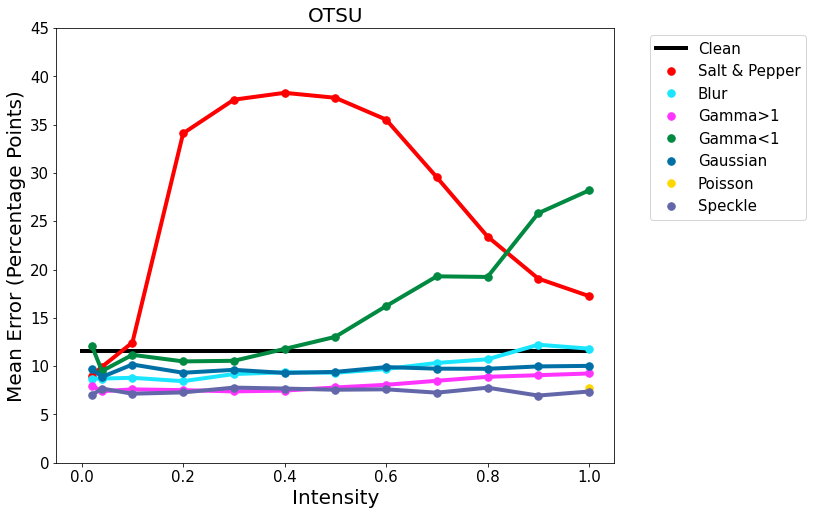

In [ ]:
for seg in range(1,5):
  plt.figure(figsize=(10,8))
  plt.title(seg_methods[seg-1],fontsize=20)
  #print(seg)
  kkk=-1
  for noise in noises:
    kkk=kkk+1
    #print(noise)
    exec(noise+'vec=np.where(tabelao_np[:,2]==(\''+noise+'\'))')
    exec('intensities = np.unique(tabelao_np['+noise+'vec,3])')
    Y=[]
    for k in range(len(intensities)):

      index_noise = np.where(tabelao_np[:,2]==noise)
      index_intens = np.where(tabelao_np[:,3]==intensities[k])
      index_segmentacao = np.where((tabelao_np[:,12])==str(seg))
      indexs=[]
      for element in index_noise[0]:
        if (element in index_intens[0]):
          if (element in index_segmentacao[0]):
            indexs.append(element)
      #      print(tabelao_np[element,: ])

      #break
      mean_error_grande  = np.mean(np.float32(tabelao_np[indexs,9]))
      mean_error_medio   = np.mean(np.float32(tabelao_np[indexs,10]))
      mean_error_pqno    = np.mean(np.float32(tabelao_np[indexs,11]))
      mean_error=(mean_error_grande+mean_error_medio+mean_error_pqno)/3
      #print(noise +'_0.'+ intensities[k], len(indexs), mean_error,',')
      Y.append(mean_error)
    if noise=='':
      X=[0,1]
      Y=[mean_error, mean_error]
      plt.plot(X,Y,'-',c=colors[kkk], label='Clean',linewidth=4)
    elif noise=='poisson':
      X=[1]
      Y=[mean_error]
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    else:
      X=[0.02,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
      plt.plot(X,Y,'-',c=colors[kkk],linewidth=4)
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
    plt.xlabel('Intensity', fontsize=20)
    plt.ylabel('Mean Error (Percentage Points)', fontsize=20)
    plt.ylim(0, 45)

    #print(X)
    #print(Y)


# Tratamento dos resultados - Pequenos

['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']


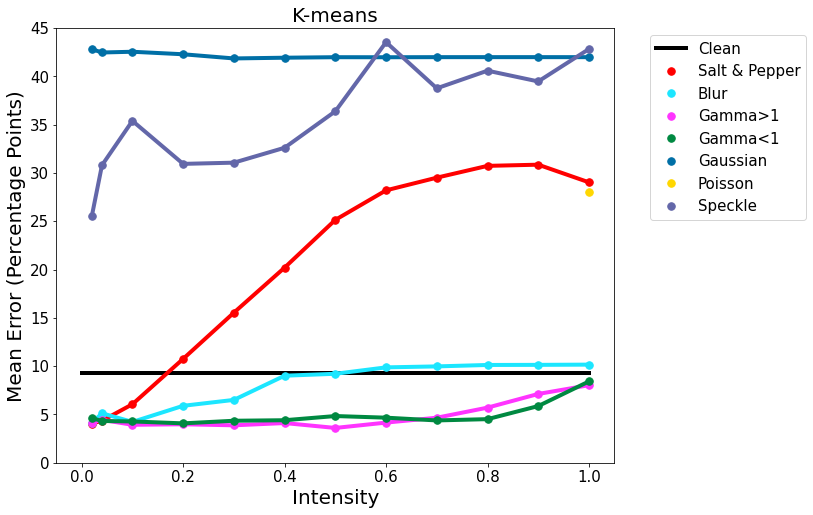

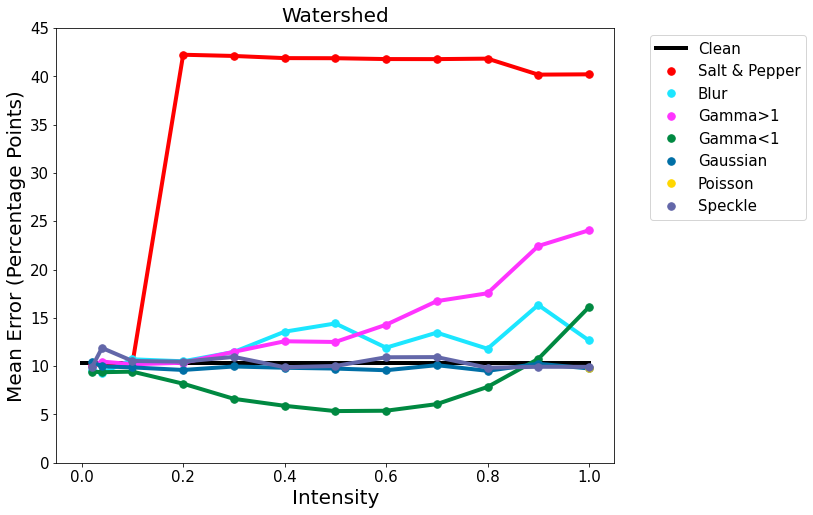

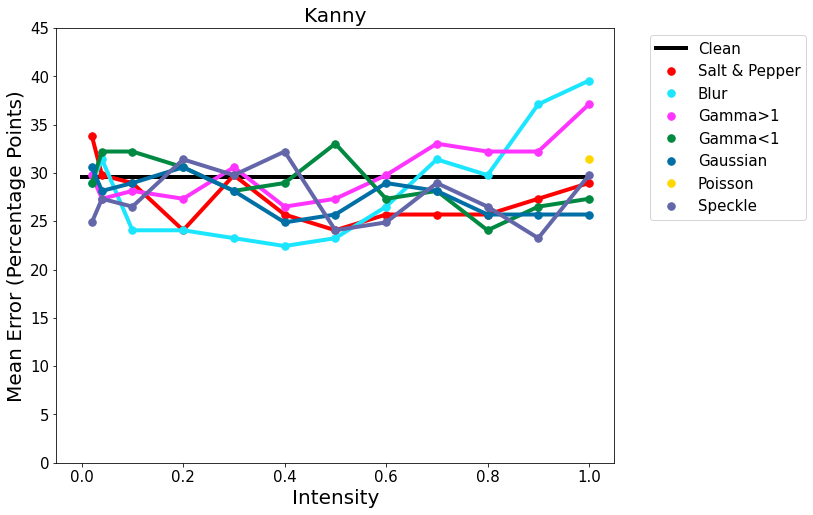

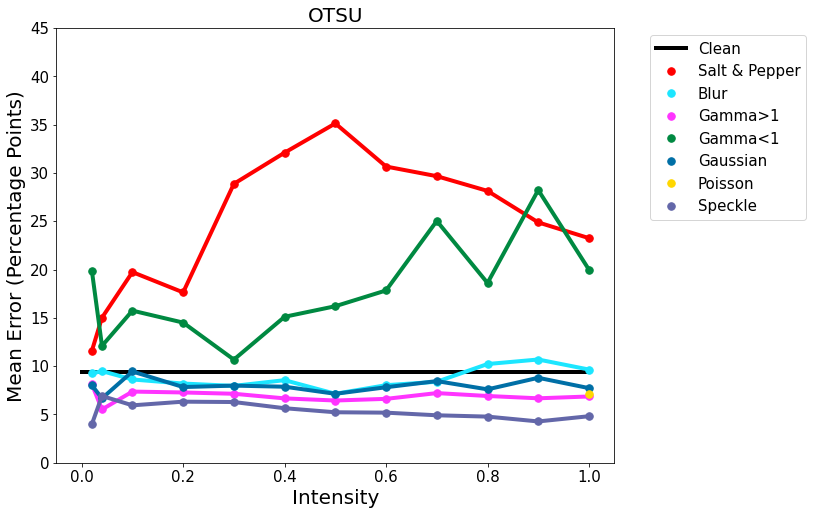

In [ ]:
import csv
tabelao=[]
with open('/content/drive/My Drive/novo_novo_csvdospqnos_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1
tabelao_np=np.asarray(tabelao)

seg_methods=['K-means', 'Watershed','Kanny', 'OTSU']
noises=['','SeP0', 'blur0', 'gamamaior0', 'gamamenor0', 'gaussian0','poisson', 'speckle0']
noises_beaut = ['','Salt & Pepper', 'Blur', 'Gamma>1', 'Gamma<1', 'Gaussian','Poisson', 'Speckle']
colors=["#000000","red","#1CE6FF","#FF34FF","#008941", "#006FA6","gold","#6367A9","#E83000"]
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})



for seg in range(1,5):
  plt.figure(figsize=(10,8))
  plt.title(seg_methods[seg-1],fontsize=20)
  #print(seg)
  kkk=-1
  for noise in noises:
    kkk=kkk+1
    #print(noise)
    exec(noise+'vec=np.where(tabelao_np[:,2]==(\''+noise+'\'))')
    exec('intensities = np.unique(tabelao_np['+noise+'vec,3])')
    Y=[]
    for k in range(len(intensities)):

      index_noise = np.where(tabelao_np[:,2]==noise)
      index_intens = np.where(tabelao_np[:,3]==intensities[k])
      index_segmentacao = np.where((tabelao_np[:,12])==str(seg))
      indexs=[]
      for element in index_noise[0]:
        if (element in index_intens[0]):
          if (element in index_segmentacao[0]):
            indexs.append(element)
      #      print(tabelao_np[element,: ])

      #break
      mean_error_grande  = np.mean(np.float32(tabelao_np[indexs,9]))
      mean_error_medio   = np.mean(np.float32(tabelao_np[indexs,10]))
      mean_error_pqno    = np.mean(np.float32(tabelao_np[indexs,11]))
      mean_error=(mean_error_grande+mean_error_medio+mean_error_pqno)/3
      #print(noise +'_0.'+ intensities[k], len(indexs), mean_error,',')
      Y.append(mean_error)
    if noise=='':
      X=[0,1]
      Y=[mean_error, mean_error]
      plt.plot(X,Y,'-',c=colors[kkk], label='Clean',linewidth=4)
    elif noise=='poisson':
      X=[1]
      Y=[mean_error]
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    else:
      X=[0.02,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
      plt.plot(X,Y,'-',c=colors[kkk],linewidth=4)
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
    plt.xlabel('Intensity', fontsize=20)
    plt.ylabel('Mean Error (Percentage Points)', fontsize=20)
    plt.ylim(0, 45)


# Tratamento dos resultados - Médios

['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']


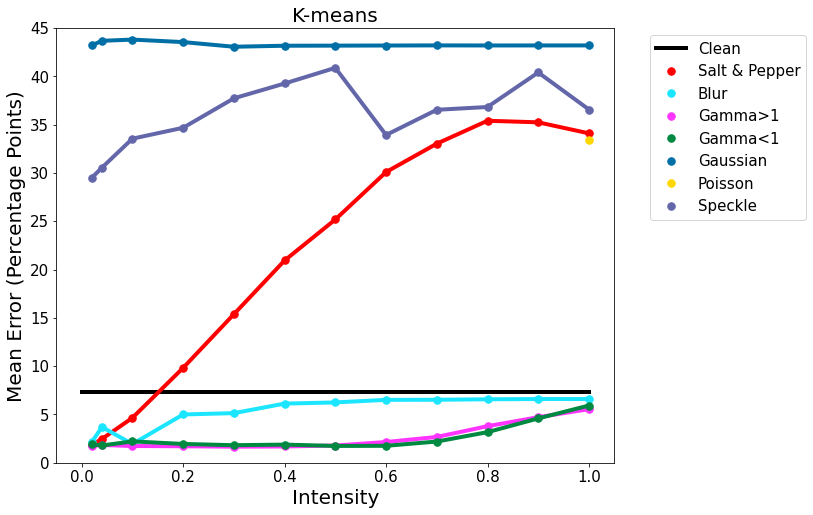

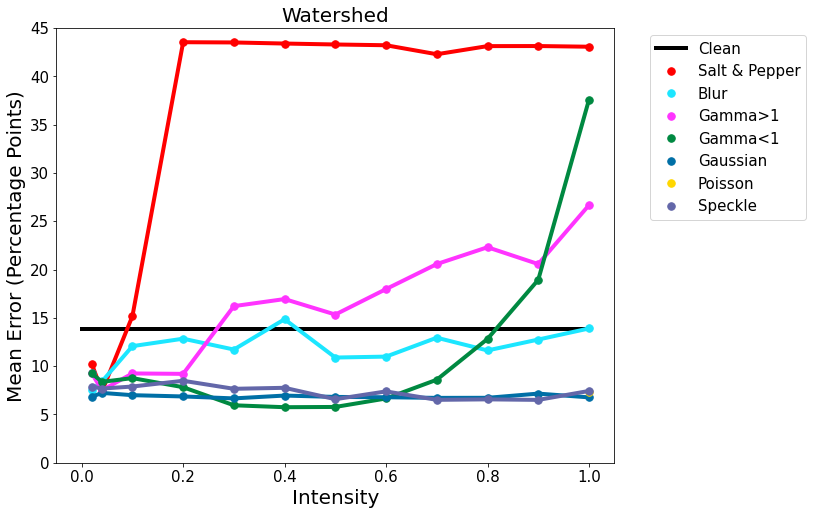

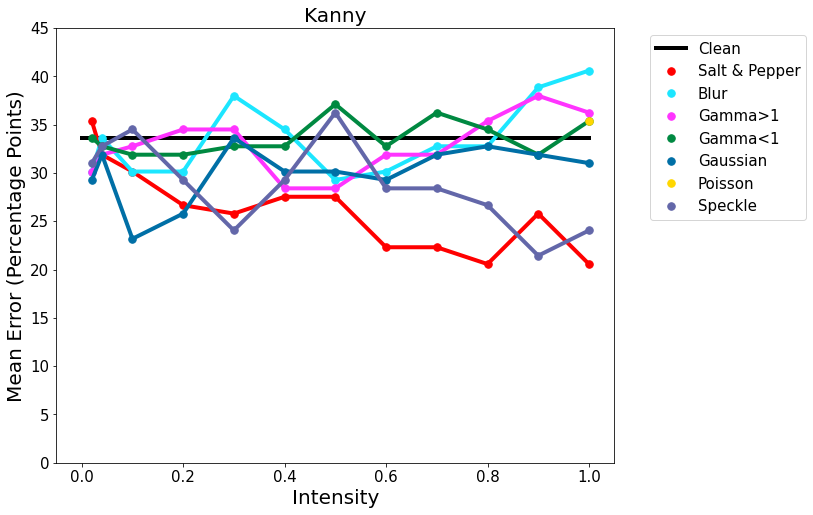

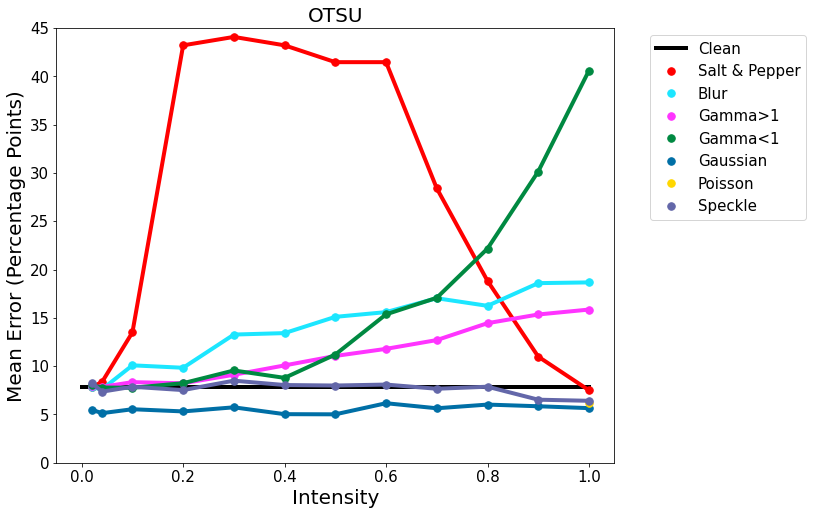

In [ ]:
import csv
tabelao=[]
with open('/content/drive/My Drive/novo_novo_csvdosmedios_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1
tabelao_np=np.asarray(tabelao)

seg_methods=['K-means', 'Watershed','Kanny', 'OTSU']
noises=['','SeP0', 'blur0', 'gamamaior0', 'gamamenor0', 'gaussian0','poisson', 'speckle0']
noises_beaut = ['','Salt & Pepper', 'Blur', 'Gamma>1', 'Gamma<1', 'Gaussian','Poisson', 'Speckle']
colors=["#000000","red","#1CE6FF","#FF34FF","#008941", "#006FA6","gold","#6367A9","#E83000"]
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})



for seg in range(1,5):
  plt.figure(figsize=(10,8))
  plt.title(seg_methods[seg-1],fontsize=20)
  #print(seg)
  kkk=-1
  for noise in noises:
    kkk=kkk+1
    #print(noise)
    exec(noise+'vec=np.where(tabelao_np[:,2]==(\''+noise+'\'))')
    exec('intensities = np.unique(tabelao_np['+noise+'vec,3])')
    Y=[]
    for k in range(len(intensities)):

      index_noise = np.where(tabelao_np[:,2]==noise)
      index_intens = np.where(tabelao_np[:,3]==intensities[k])
      index_segmentacao = np.where((tabelao_np[:,12])==str(seg))
      indexs=[]
      for element in index_noise[0]:
        if (element in index_intens[0]):
          if (element in index_segmentacao[0]):
            indexs.append(element)
      #      print(tabelao_np[element,: ])

      #break
      mean_error_grande  = np.mean(np.float32(tabelao_np[indexs,9]))
      mean_error_medio   = np.mean(np.float32(tabelao_np[indexs,10]))
      mean_error_pqno    = np.mean(np.float32(tabelao_np[indexs,11]))
      mean_error=(mean_error_grande+mean_error_medio+mean_error_pqno)/3
      #print(noise +'_0.'+ intensities[k], len(indexs), mean_error,',')
      Y.append(mean_error)
    if noise=='':
      X=[0,1]
      Y=[mean_error, mean_error]
      plt.plot(X,Y,'-',c=colors[kkk], label='Clean',linewidth=4)
    elif noise=='poisson':
      X=[1]
      Y=[mean_error]
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    else:
      X=[0.02,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
      plt.plot(X,Y,'-',c=colors[kkk],linewidth=4)
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
    plt.xlabel('Intensity', fontsize=20)
    plt.ylabel('Mean Error (Percentage Points)', fontsize=20)
    plt.ylim(0, 45)


# Tratamento dos resultados - Grandes

['cd', 'file', 'noise', 'intensidade', 'png', 'preal_grande', 'preal_medio', 'preal_pqno', 'erro_pgrande', 'erro_pmedio', 'erro_ppqno', 'erro_medio', '1=kmeans_2=watershed_3=kanny_4=otsu']


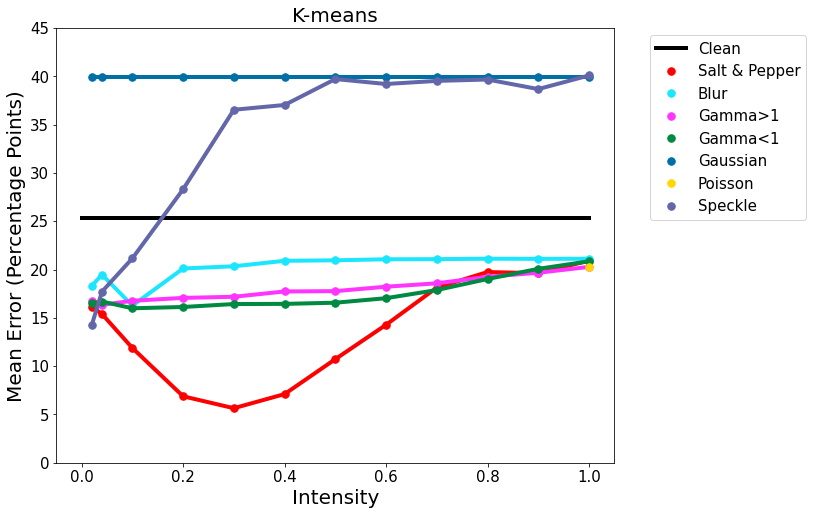

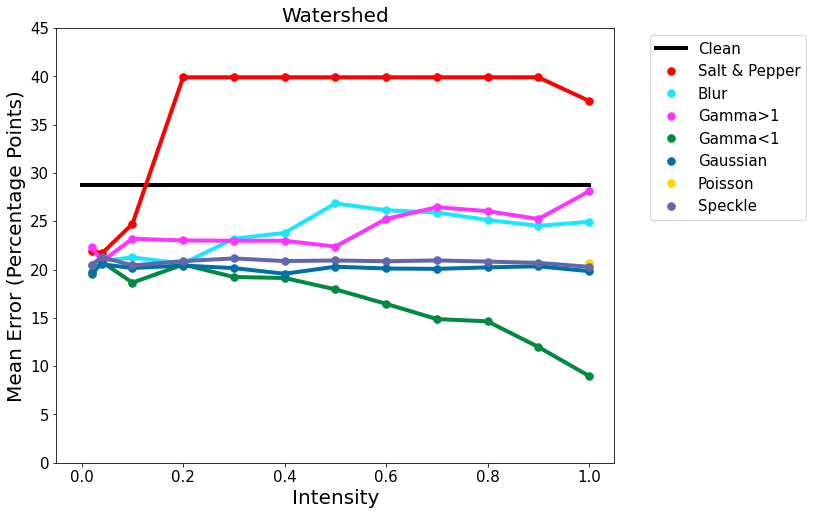

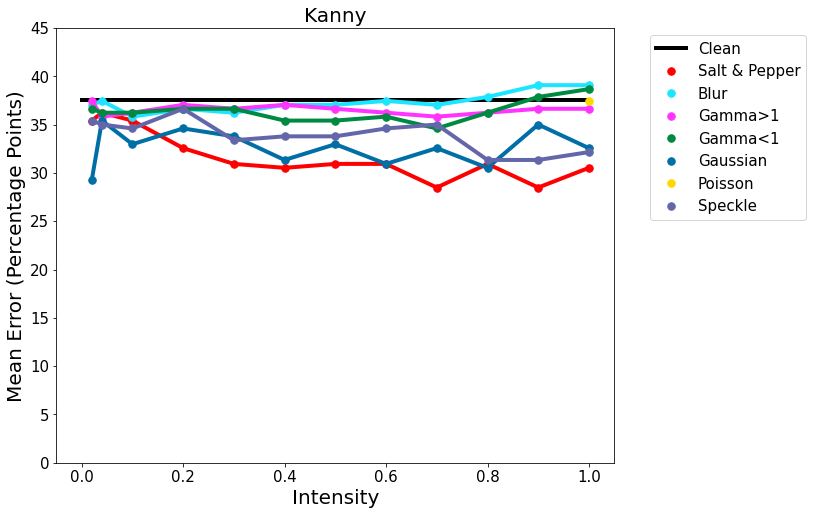

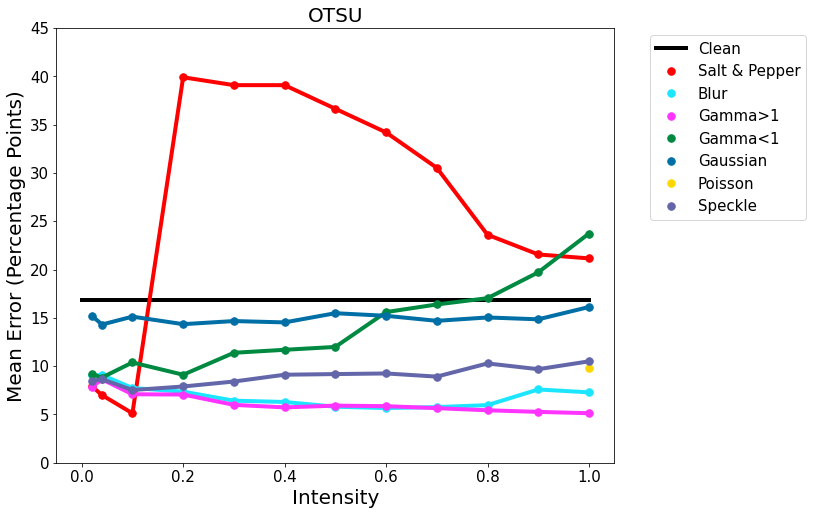

In [ ]:
import csv
tabelao=[]
with open('/content/drive/My Drive/novo_novo_csvdosgrandes_ruidos.csv') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=';')
  k=0
  for row in spamreader:
    if k<1:
      print(row)
    else:
      tabelao.append(row)
    k=k+1
tabelao_np=np.asarray(tabelao)

seg_methods=['K-means', 'Watershed','Kanny', 'OTSU']
noises=['','SeP0', 'blur0', 'gamamaior0', 'gamamenor0', 'gaussian0','poisson', 'speckle0']
noises_beaut = ['','Salt & Pepper', 'Blur', 'Gamma>1', 'Gamma<1', 'Gaussian','Poisson', 'Speckle']
colors=["#000000","red","#1CE6FF","#FF34FF","#008941", "#006FA6","gold","#6367A9","#E83000"]
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})



for seg in range(1,5):
  plt.figure(figsize=(10,8))
  plt.title(seg_methods[seg-1],fontsize=20)
  #print(seg)
  kkk=-1
  for noise in noises:
    kkk=kkk+1
    #print(noise)
    exec(noise+'vec=np.where(tabelao_np[:,2]==(\''+noise+'\'))')
    exec('intensities = np.unique(tabelao_np['+noise+'vec,3])')
    Y=[]
    for k in range(len(intensities)):

      index_noise = np.where(tabelao_np[:,2]==noise)
      index_intens = np.where(tabelao_np[:,3]==intensities[k])
      index_segmentacao = np.where((tabelao_np[:,12])==str(seg))
      indexs=[]
      for element in index_noise[0]:
        if (element in index_intens[0]):
          if (element in index_segmentacao[0]):
            indexs.append(element)
      #      print(tabelao_np[element,: ])

      #break
      mean_error_grande  = np.mean(np.float32(tabelao_np[indexs,9]))
      mean_error_medio   = np.mean(np.float32(tabelao_np[indexs,10]))
      mean_error_pqno    = np.mean(np.float32(tabelao_np[indexs,11]))
      mean_error=(mean_error_grande+mean_error_medio+mean_error_pqno)/3
      #print(noise +'_0.'+ intensities[k], len(indexs), mean_error,',')
      Y.append(mean_error)
    if noise=='':
      X=[0,1]
      Y=[mean_error, mean_error]
      plt.plot(X,Y,'-',c=colors[kkk], label='Clean',linewidth=4)
    elif noise=='poisson':
      X=[1]
      Y=[mean_error]
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    else:
      X=[0.02,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
      plt.plot(X,Y,'-',c=colors[kkk],linewidth=4)
      plt.plot(X,Y,'.',c=colors[kkk],label=noises_beaut[kkk],markersize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
    plt.xlabel('Intensity', fontsize=20)
    plt.ylabel('Mean Error (Percentage Points)', fontsize=20)
    plt.ylim(0, 45)


# ideias

1. Analisar erros sem absoluto em cada categoria
a- erro p grande, erro p medio, erro p pqnos (3)
b- pra cada segmentação (4)
c- pra cada ruido (cor)
d- pra cada instensidade  (eixo x)
e- para maioria grande, maioria média, maioria pqnos (3)

grafico (Y= erro (sem absoluto) X= intensidade, ruido=cor)

* função parametrizada por a, b, e